In [1]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib notebook

In [2]:
def get_consumption(mtype, api_key, mpan, serial):
    api_base_url = 'https://api.octopus.energy/v1'
    consumptionurl= f'{api_base_url}/{mtype}-meter-points/{mpan}/meters/{serial}/consumption/'
    response = requests.get(consumptionurl, auth = (api_key, ''))
    data = json.loads(response.text)['results']
    dates = [datetime.datetime.strptime(d['interval_start'], '%Y-%m-%dT%H:%M:%SZ') for d in data]
    values = [d['consumption'] for d in data]
    return dates, values

In [9]:
with open("meters.json") as json_data_file:
    config = json.load(json_data_file)

In [25]:
edates, evalues = get_consumption('electricity', config['api_key'], config["emeter_mpan"], config["emeter_serial"])
gdates, gvalues = get_consumption('gas', config['api_key'], config["gmeter_mprn"], config["gmeter_serial"])

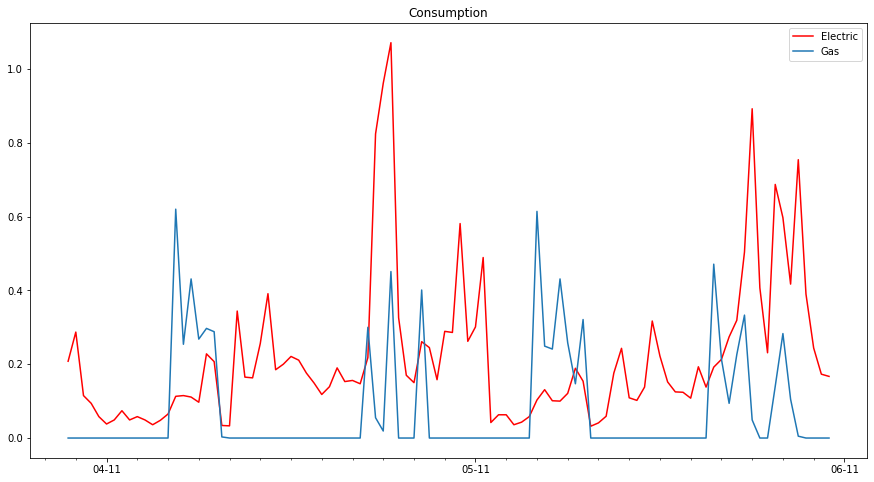

In [32]:
plt.figure(figsize=(15,8))
plt.plot(edates, evalues, label='Electric', color='Red')
plt.plot(gdates, gvalues, label='Gas')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=2))
plt.title('Consumption')
plt.legend()